In [1]:
import matplotlib.pyplot as plt
import numpy as np
from plyfile import PlyData
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


c:\users\cmex-\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
surface2 = PlyData.read('Image0008.ply')
vertices = surface2['vertex'].data
faces = surface2['face'].data

In [3]:
surface2

PlyData((PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float')), count=65536, comments=[]), PlyElement('face', (PlyListProperty('vertex_index', 'uchar', 'int'),), count=130050, comments=[])), text=True, byte_order='=', comments=['exported from Gwyddion', 'title HeightRetrace'], obj_info=[])

In [4]:
vertices

array([(  0.,   0., 11.630562), (  1.,   0., 11.472101),
       (  2.,   0., 11.256812), ..., (253., 255.,  8.217291),
       (254., 255.,  8.590614), (255., 255.,  9.010902)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4')])

In [5]:
faces

array([(array([  0, 257, 256]),), (array([  0,   1, 257]),),
       (array([  1, 258, 257]),), ..., (array([65277, 65278, 65534]),),
       (array([65278, 65535, 65534]),), (array([65278, 65279, 65535]),)],
      dtype=[('vertex_index', 'O')])

In [14]:
pcd = o3d.io.read_point_cloud('Image0008.ply')
o3d.visualization.draw_geometries([pcd])

In [7]:
def compute_normal(A, B, C):
    AB = B - A
    AC = C - A
    N = np.cross(AB, AC)
    return N / np.linalg.norm(N)  # Normalized normal

In [8]:
vertices_np = np.array(vertices.tolist())
faces_np = np.array([face[0] for face in faces])
A = vertices_np[faces_np[:, 0]]
B = vertices_np[faces_np[:, 1]]
C = vertices_np[faces_np[:, 2]]
print(faces_np)
# Calculate edge vectors
AB = B - A
AC = C - A
# Compute normals
normals = np.cross(AB, AC)
# Normalize the normals
normals = normals / np.linalg.norm(normals, axis=1)[:, np.newaxis]

[[    0   257   256]
 [    0     1   257]
 [    1   258   257]
 ...
 [65277 65278 65534]
 [65278 65535 65534]
 [65278 65279 65535]]


In [9]:
normals

array([[ 0.08574384, -0.09530592,  0.99174834],
       [ 0.1543943 , -0.16378853,  0.97433861],
       [ 0.12740383, -0.16442537,  0.97812707],
       ...,
       [-0.28746367,  0.3238447 ,  0.90138186],
       [-0.36780858,  0.31441464,  0.87513444],
       [-0.32685597,  0.27162779,  0.90519805]])

(-1.0, 81.0)

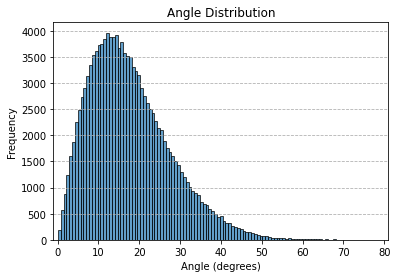

In [24]:
z_norm = np.array([0, 0, 1])
dot_products = np.dot(normals, z_norm)
cosine_angles = dot_products
# Compute the angles using arccosine (result is in radians)
angles_radians = np.arccos(np.clip(cosine_angles, -1.0, 1.0))
# If you want the angles in degrees
angles_degrees = np.degrees(angles_radians)

plt.hist(angles_degrees, bins=100, edgecolor='black', alpha=0.7)
plt.title('Angle Distribution')
plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.xlim(-1, 81)

In [11]:
max(vertices_np[:, 2])

13.90183162689209

In [12]:
min(vertices_np[:, 2])


0.0

In [18]:
# surface_area
areas = 0.5 * np.linalg.norm(np.cross(AB, AC), axis=1)
total_surface_area = np.sum(areas)
print(total_surface_area / 2.55e+07 / 2.55e+07 / 1e-12)

107.1383089592759
